In [3]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Load the dataset
df = pd.read_csv('/content/climate_nasa.csv')

# Explor the data

In [12]:
df.head(10)

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
5,2022-09-15T17:10:57.000Z,4,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,1.0,Excellent example...very relatable to the Gen ...
6,2022-09-07T17:31:25.000Z,10,a9117191b443a0494349d21508a3de7df675250b786612...,NaN,I am so proud of whoever created this content....
7,2022-09-07T18:07:53.000Z,1,39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...,21.0,Has the Earth ever had a concentration of over...
8,2022-09-07T22:45:56.000Z,0,1492464caa9b6757f6e740a6cc8f75a44614645e9f6c64...,NaN,"Yes, and not even half a cup later that poor s..."
9,2022-09-07T16:30:55.000Z,4,31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...,8.0,Historical co2 data would make it an interesti...


In [7]:
# Get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [8]:
df.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [9]:
# see the data if there i null data rows or columns
df.isnull().sum()

,0
date,0
likesCount,0
profileName,0
commentsCount,278
text,18


In [11]:
df.shape

(522, 5)

In [33]:
# preprocess the data and seperate the feather labels
# Assuming 'likesCount' is the target variable for regression
X = df.drop(['profileName', 'date', 'text', 'likesCount'], axis=1)
y = df['likesCount']

In [34]:
# split the data in to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
# Handle missing values in 'commentsCount' by filling with the mean
# Ensure that X_train and X_test are pandas DataFrames before imputation
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=['commentsCount'])
if not isinstance(X_test, pd.DataFrame):
     X_test = pd.DataFrame(X_test, columns=['commentsCount'])

X_train['commentsCount'].fillna(X_train['commentsCount'].mean(), inplace=True)
X_test['commentsCount'].fillna(X_test['commentsCount'].mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/tmp/ipython-input-35-1428328203.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['commentsCount'].fillna(X_train['commentsCount'].mean(), inplace=True)
/tmp/ipython-input-35-1428328203.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [36]:
 # Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
 # Make predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
mae =mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 5.740172681074966
MSE: 153.90940625595087
R2: 0.14338083570761428


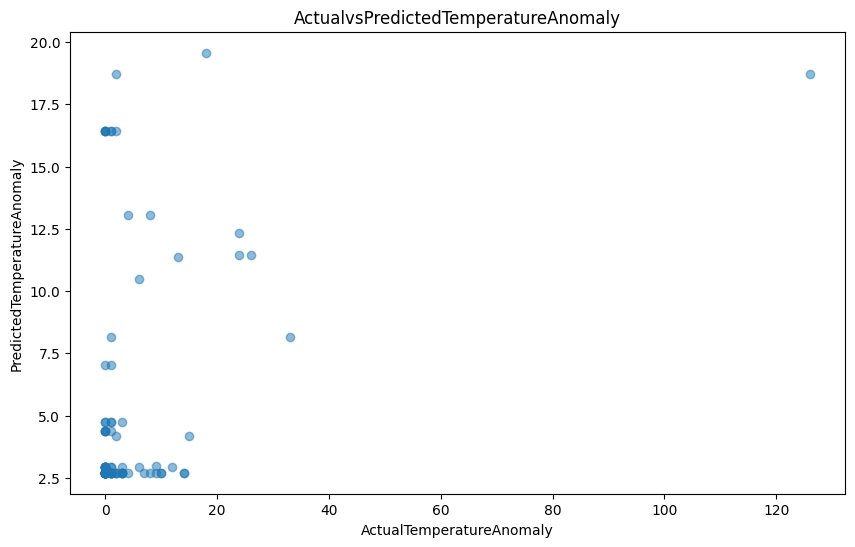

In [40]:
 # Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('ActualTemperatureAnomaly')
plt.ylabel('PredictedTemperatureAnomaly')
plt.title('ActualvsPredictedTemperatureAnomaly')
plt.show()

In [45]:
# Future projections (mock example)
# Assuming we have future data for the same features ('commentsCount' in this case)
# Creating a mock future dataset for demonstration by using the existing data
future_data = df[['commentsCount']].copy()

# Handle missing values in mock future data by filling with the mean
# Using assignment instead of inplace=True for reliability
future_data['commentsCount'] = future_data['commentsCount'].fillna(df['commentsCount'].mean())


# Scale the future data using the *already fitted* scaler
# The scaler expects a 2D array or DataFrame
future_data_scaled = scaler.transform(future_data)

# Make future predictions
future_predictions = model.predict(future_data_scaled)

# Display the mock future data and predictions
print("Mock Future Data (Scaled):")
display(future_data_scaled[:10]) # Display first 10 scaled future data points
print("\nMock Future Predictions (LikesCount):")
display(future_predictions[:10])

Mock Future Data (Scaled):


array([[-0.04009753],
       [-0.04009753],
       [-0.68386382],
       [-0.04009753],
       [ 1.9152847 ],
       [-0.90987674],
       [-0.04009753],
       [ 1.35025242],
       [-0.04009753],
       [-0.11883153]])


Mock Future Predictions (LikesCount):


array([ 1.15764968,  1.15764968, 16.43256921,  1.15764968, 20.07695238,
        2.94341407,  1.15764968,  2.52      ,  1.15764968, 13.05821737])